In [17]:
import numpy as np

x = np.array([1, 2,3,4,5,6,7,9])
y=np.expand_dims(x,axis=(-1))
print(y)



[[1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]
 [9]]


Epoch 1/10
1875/1875 [==============================] - 29s 14ms/step - loss: 0.1525 - accuracy: 0.9528 - val_loss: 0.0476 - val_accuracy: 0.9850
Epoch 2/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0474 - accuracy: 0.9852 - val_loss: 0.0385 - val_accuracy: 0.9881
Epoch 3/10
1875/1875 [==============================] - 26s 14ms/step - loss: 0.0339 - accuracy: 0.9893 - val_loss: 0.0404 - val_accuracy: 0.9863
Epoch 4/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0245 - accuracy: 0.9922 - val_loss: 0.0266 - val_accuracy: 0.9911
Epoch 5/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0196 - accuracy: 0.9938 - val_loss: 0.0264 - val_accuracy: 0.9918
Epoch 6/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0156 - accuracy: 0.9948 - val_loss: 0.0376 - val_accuracy: 0.9902
Epoch 7/10
1875/1875 [==============================] - 27s 14ms/step - loss: 0.0148 - accuracy: 0.9949 - val_loss: 0.0270 -

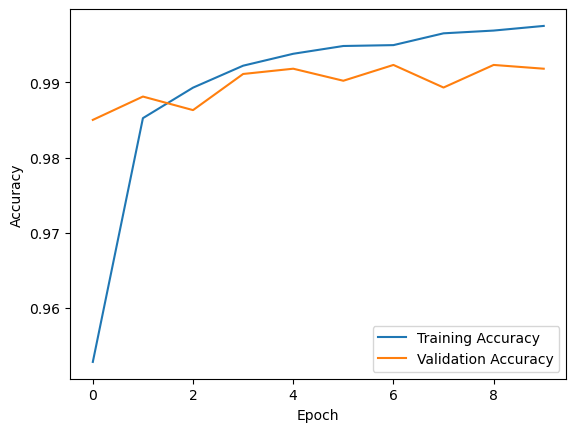

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalize the pixel values to range [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

# Add a channel dimension to the images (required for CNN input)
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)
 
# Convert labels to one-hot encoded vectors
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=10)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=10)


model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_data=(test_images, test_labels))

test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

